In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create an engine to connect to our database..
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model. to automap sql classes into python.
Base = automap_base()
# reflect the tables to only get python classes.
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found.
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table by re-defining them.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# view columns for Measurment...
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f546ecd748>,
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [11]:
# view columns for Station..
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f546f97cc8>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

In [58]:
# view the Station columns content....
for row in session.query(Station.latitude, Station.station, Station.elevation, Station.longitude, Station.id, Station.name).limit(15).all():
    print(row)

(21.2716, 'USC00519397', 3.0, -157.8168, 1, 'WAIKIKI 717.2, HI US')
(21.4234, 'USC00513117', 14.6, -157.8015, 2, 'KANEOHE 838.1, HI US')
(21.5213, 'USC00514830', 7.0, -157.8374, 3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(21.3934, 'USC00517948', 11.9, -157.9751, 4, 'PEARL CITY, HI US')
(21.4992, 'USC00518838', 306.6, -158.0111, 5, 'UPPER WAHIAWA 874.3, HI US')
(21.33556, 'USC00519523', 19.5, -157.71139, 6, 'WAIMANALO EXPERIMENTAL FARM, HI US')
(21.45167, 'USC00519281', 32.9, -157.84888999999998, 7, 'WAIHEE 837.5, HI US')
(21.3152, 'USC00511918', 0.9, -157.9992, 8, 'HONOLULU OBSERVATORY 702.2, HI US')
(21.3331, 'USC00516128', 152.4, -157.8025, 9, 'MANOA LYON ARBO 785.2, HI US')


In [59]:
# view the Measurement columns content....
for row in session.query(Measurement.prcp, Measurement.id, Measurement.tobs, Measurement.station, Measurement.date).limit(15).all():
    print(row)

(0.08, 1, 65.0, 'USC00519397', '2010-01-01')
(0.0, 2, 63.0, 'USC00519397', '2010-01-02')
(0.0, 3, 74.0, 'USC00519397', '2010-01-03')
(0.0, 4, 76.0, 'USC00519397', '2010-01-04')
(None, 5, 73.0, 'USC00519397', '2010-01-06')
(0.06, 6, 70.0, 'USC00519397', '2010-01-07')
(0.0, 7, 64.0, 'USC00519397', '2010-01-08')
(0.0, 8, 68.0, 'USC00519397', '2010-01-09')
(0.0, 9, 73.0, 'USC00519397', '2010-01-10')
(0.01, 10, 64.0, 'USC00519397', '2010-01-11')
(0.0, 11, 61.0, 'USC00519397', '2010-01-12')
(0.0, 12, 66.0, 'USC00519397', '2010-01-14')
(0.0, 13, 65.0, 'USC00519397', '2010-01-15')
(0.0, 14, 68.0, 'USC00519397', '2010-01-16')
(0.0, 15, 64.0, 'USC00519397', '2010-01-17')


In [14]:
# first date in Measurement table..
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [15]:
# last date in Measurement table..
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

# Exploratory Climate Analysis

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# query Measurement table and filter by date to get data for last 12 month using last date from above query...
# creat a pandas dataframe for date and percipitation and use it for plot...

data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
    
data_df = pd.DataFrame(data, columns = ['date', 'prcp'])
data_df = data_df.set_index('date').dropna()
data_df.tail()
# date = [data[0] for dt in data]
# prcp = [data[1] for dt in data]
# prcp

,prcp
date,
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45


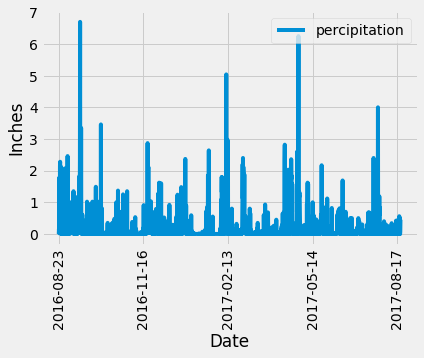

In [57]:
# percipitation plot..

data_df.plot(rot=90)
plt.legend(['percipitation'], loc='upper right')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [19]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
print(query_date)

2016-08-23


In [20]:
# Perform a query to retrieve the data and precipitation scores

data_query = session.query(Measurement.date, Measurement.tobs, Measurement.station, Measurement.prcp, Measurement.id)

In [21]:
# Create a dataframe from the query results and set the index to the date column

prcp_df = pd.DataFrame(data_query, columns = ['date', 'tobs', 'station', 'prcp', 'id'])
prcp_df = prcp_df.set_index('date').dropna()
prcp_df.tail()

,tobs,station,prcp,id
date,,,,
2017-08-17,72.0,USC00516128,0.13,19544
2017-08-19,71.0,USC00516128,0.09,19546
2017-08-21,76.0,USC00516128,0.56,19548
2017-08-22,76.0,USC00516128,0.50,19549
2017-08-23,76.0,USC00516128,0.45,19550


In [22]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date', ascending=False)

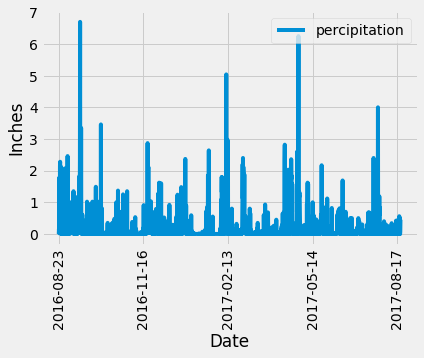

In [60]:
# Use Pandas Plotting with Matplotlib to plot the data
"""Note: what this means is to use the .plot() method on your dataframe variable,
and then format the labels with methods like plt.xlabel() and plt.title(). 

For example:
df.plot()
plt.xlabels()

As opposed to:
plt.bar()
plt.xlabels()

This is something you would never actually do. If you're importing matplotlib, you'd use
it to generate the plot, as well as the formatting. It's good practice, if you're importing a library,
to use it for everything you can use that library for. Every libarary you causes your program to take up
more memory, so use what you import.
"""

data_df.plot(rot=90)
plt.legend(['percipitation'], loc='upper right')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summary_stat = data_df[["prcp"]].describe()
summary_stat

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [66]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(Station.station).count()

print(f"There are: {stations} Stations in This Dataset")

There are: 9 Stations in This Dataset


In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_count = prcp_df.groupby(["station"])['station'].count()
station_count = station_count.sort_values(ascending=False)
station_count

station
USC00519281    2772
USC00513117    2696
USC00519397    2685
USC00519523    2572
USC00516128    2484
USC00514830    1937
USC00511918    1932
USC00517948     683
USC00518838     342
Name: station, dtype: int64

In [37]:
# Using the Measurement id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active Measurement?

sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs), func.count(Measurement.tobs)]
records = session.query(*sel).\
    filter(Measurement.station == 'USC00519281')
    
for rec in records:
    print(f"For Station USC00519281:")
    print(f"Min Temprature is: {rec[0]}")
    print(f"Max Temprature is: {rec[1]}")
    print(f"Average Temprature is: {round(rec[2], 2)}")
    print(f"Station Observation Count is: {rec[3]}")

For Station USC00519281:
Min Temprature is: 54.0
Max Temprature is: 85.0
Average Temprature is: 71.66
Station Observation Count is: 2772


In [62]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# query the last 12 months of temp observation from Measurement table for selected station..
# filtered for station with highest observation and on date to only return last 12 month data...

temp = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23').all()

In [42]:
# created a pandas dataframe for plot data...

hist_df = pd.DataFrame(temp, columns = ['tobs'])
hist_df = hist_df.dropna()
hist_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


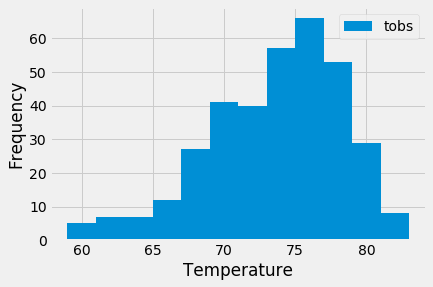

In [63]:
# plotting histogram for temperation on last 12 month for station USC00519281...

hist_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## Bonus Challenge Assignment

In [67]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
